In [1]:
## import Modules
from sympy import *
from sympy.physics.mechanics import *
init_vprinting()

## Governing equation
m,k,g,t =symbols("m k g t")
x=dynamicsymbols("x")

vel=diff(x,t)
acc=diff(vel,t)

## Defining Lagrangian
KE= 0.5*m*(vel**2)
PE=0.5*k*(x**2) - m*g*x

lgr= KE - PE
eqn=diff(diff(lgr,vel),t) - diff(lgr,x)
sln=solve(eqn,acc)[0]
Eq(acc,sln)

##import Modules
import numpy as np
from scipy.integrate import solve_ivp

## solve the GE
# system constants & initial conditions
g=9.81
m=1
k=10

x0=0
vel0=0

def spring_mass_g(t,y):return (y[1],g - (y[0])*k/m)

sol = solve_ivp(spring_mass_g,[0,10],[x0,vel0],t_eval=np.linspace(0,10,101))
x,vel=sol.y
t=sol.t


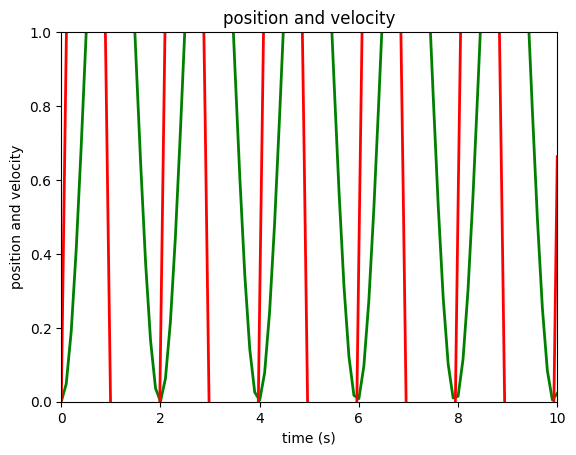

In [3]:
## import modules
import matplotlib.pyplot as plt
from matplotlib.animation import Animation

# plot spring mass system
fig_curve,ax=plt.subplots()

ax.set_title("position and velocity")
ax.set_xlim(0,10)
ax.set_ylim()
ax.set_xlabel("time (s)")
ax.set_ylabel("position and velocity")
ax.plot(t,x,"g",lw=2)
ax.plot(t,vel,"r",lw=2)

